In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu

def compare_samples_mannwhitney(df, col1, col2, alpha=0.05):
    """
    Сравнивает две количественные выборки с помощью U-теста Манна-Уитни:
    - Визуализация распределений
    - Проверка нормальности (Шапиро-Уилк)
    - Тест Манна-Уитни для сравнения медиан
    """

    sample1 = df[col1].dropna()
    sample2 = df[col2].dropna()

    # Визуализация
    # plt.figure(figsize=(12, 6))

    # Гистограммы с медианами
    # plt.subplot(1, 2, 1)
    # sns.histplot(sample1, kde=True, color='skyblue', label=col1)
    # sns.histplot(sample2, kde=True, color='red', label=col2, alpha=0.5)
    # plt.axvline(sample1.median(), color='blue', linestyle='--', label=f'Медиана {col1}')
    # plt.axvline(sample2.median(), color='darkred', linestyle='--', label=f'Медиана {col2}')
    # plt.title('Распределения и медианы')
    # plt.legend()

    # # Боксплоты
    # plt.subplot(1, 2, 2)
    # sns.boxplot(data=df[[col1, col2]], palette=['skyblue', 'red'])
    # plt.title('Боксплоты')

    # plt.tight_layout()
    # plt.show()

    # Проверка нормальности (для понимания данных)
    def check_normality(sample, name):
        stat_sw, p_sw = shapiro(sample)
        # print(f"{name}: p-value = {p_sw:.4f}",
        #       "(нормальное)" if p_sw > alpha else "(не нормальное)")

    # print("\nПроверка нормальности:")
    check_normality(sample1, col1)
    check_normality(sample2, col2)

    # Тест Манна-Уитни
    U_stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
    # print(f"\nТест Манна-Уитни:")
    # print(f"U-статистика = {U_stat}, p-value = {p_value:.7f}")
    # print("Вывод:", "Есть различия в медианах (отвергаем H₀)" if p_value < alpha
    #       else "Нет различий в медианах (не отвергаем H₀)")

    # Размер эффекта (r = Z / sqrt(n))
    n1, n2 = len(sample1), len(sample2)
    Z = stats.norm.ppf(p_value/2)  # Z-значение для двустороннего теста
    r_effect = abs(Z) / np.sqrt(n1 + n2)
    # print(f"Размер эффекта (r): {r_effect:.3f}",
    #       "(малый <0.1, средний 0.3, большой >0.5)" if r_effect < 0.5 else "")
    return f'{p_value:.4f}'

In [14]:
from statsmodels.stats.multitest import multipletests

# Предположим, у вас есть список p-значений от нескольких тестов:
# p_values = [0.01, 0.04, 0.06]


In [25]:
# disorders = ['borderline.personality.disorder',
#              'bipolar.affective.disorder', 'depressive.episode',
#              'recurrent.depressive.disorder', 'personality.disorder',
#              'schizoaffective.disorder', 'schizophrenia', 'schizotypal.disorder'
#              ]
excel_file = pd.ExcelFile("/content/md_statistics.xlsx")
metrics = excel_file.sheet_names

res = {'metric': [],
    'p_value': []
}
for metric in metrics:
  df_norm = pd.read_excel(f'/content/control_statistics.xlsx', sheet_name=metric)
  df_disorder = pd.read_excel(f'/content/md_statistics.xlsx', sheet_name=metric)

  data = {
      'df_norm': df_norm[metric],
      'df_md': df_disorder[metric]
  }
  df = pd.DataFrame(data)
  result = compare_samples_mannwhitney(df, 'df_norm', 'df_md', alpha=0.05)
  res['metric'].append(metric)
  res['p_value'].append(result)

In [26]:
result = pd.DataFrame(res)
p_values = result['p_value'].apply(lambda x: float(x)).tolist()
result['p_value'] = multipletests(p_values, method='bonferroni')[1]

result.to_excel("significant_all.xlsx")

In [24]:
res

{'metric': ['average_sentence_lenth',
  'average_word_lenth',
  'Flash_Kincaid_readability',
  'Gunning_Fog_Index',
  'TTR',
  'Pr',
  'Qu',
  'Ac',
  'Din',
  'Con',
  'Switch_number',
  'Mean_cluster_t_score',
  'Silhouette_score',
  'Mean_distance',
  'Mean_cluster_size'],
 'disorder': [],
 'p_value': ['0.2364',
  '0.0533',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0000',
  '0.0002',
  '0.0001',
  '0.0160',
  '0.3071',
  '0.0000',
  '0.0000',
  '0.2120',
  '0.0035',
  '0.1403']}

In [ ]:
df_schizo = pd.read_excel("/content/control_statistics.xlsx", sheet_name='TTR')
df_schizo = df_schizo[df_schizo['fileID'] != 'average_TTR:'].dropna()

In [ ]:
df_bipolar = pd.read_excel("/content/borderline.personality.disorder.xlsx", sheet_name='TTR')
df_bipolar = df_bipolar[df_bipolar['fileID'] != 'average_TTR:'].dropna()

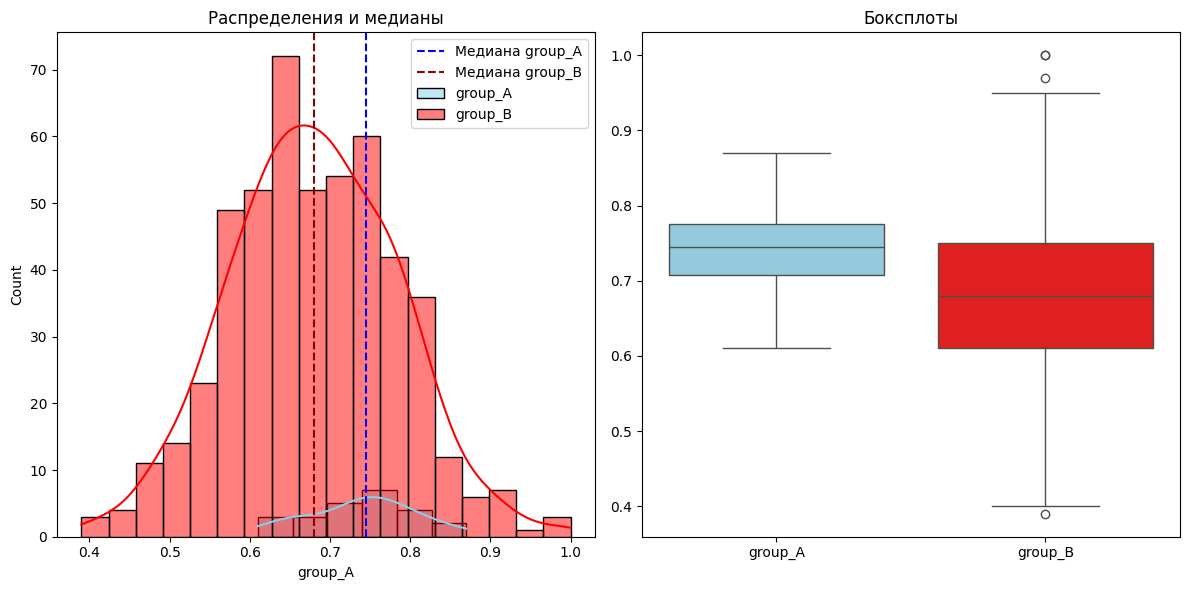


Проверка нормальности:
group_A: p-value = 0.7844 (нормальное)
group_B: p-value = 0.7202 (нормальное)

Тест Манна-Уитни:
U-статистика = 8274.5, p-value = 0.0018
Вывод: Есть различия в медианах (отвергаем H₀)
Размер эффекта (r): 0.136 (малый <0.1, средний 0.3, большой >0.5)


In [ ]:


# Пример использования
np.random.seed(42)
data = {
    'group_A': df_bipolar['ttr'],
    'group_B': df_schizo['ttr']
}
df = pd.DataFrame(data)

# Вызываем функцию для сравнения
compare_samples_mannwhitney(df, 'group_A', 'group_B', alpha=0.05)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu

def compare_samples_mannwhitney(df, col1, col2, alpha=0.05):
    """
    Сравнивает две количественные выборки с помощью U-теста Манна-Уитни:
    - Визуализация распределений
    - Проверка нормальности (Шапиро-Уилк)
    - Тест Манна-Уитни для сравнения медиан
    """

    # Извлечение данных
    sample1 = df[col1].dropna()
    sample2 = df[col2].dropna()

    # Визуализация
    plt.figure(figsize=(12, 6))

    # Гистограммы с медианами
    plt.subplot(1, 2, 1)
    sns.histplot(sample1, kde=True, color='skyblue', label=col1)
    sns.histplot(sample2, kde=True, color='red', label=col2, alpha=0.5)
    plt.axvline(sample1.median(), color='blue', linestyle='--', label=f'Медиана {col1}')
    plt.axvline(sample2.median(), color='darkred', linestyle='--', label=f'Медиана {col2}')
    plt.title('Распределения и медианы')
    plt.legend()

    # Боксплоты
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[[col1, col2]], palette=['skyblue', 'red'])
    plt.title('Боксплоты')

    plt.tight_layout()
    plt.show()

    # Проверка нормальности (для понимания данных)
    def check_normality(sample, name):
        stat_sw, p_sw = shapiro(sample)
        print(f"{name}: p-value = {p_sw:.4f}",
              "(нормальное)" if p_sw > alpha else "(не нормальное)")

    print("\nПроверка нормальности:")
    check_normality(sample1, col1)
    check_normality(sample2, col2)

    # Тест Манна-Уитни
    U_stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
    print(f"\nТест Манна-Уитни:")
    print(f"U-статистика = {U_stat}, p-value = {p_value:.4f}")
    print("Вывод:", "Есть различия в медианах (отвергаем H₀)" if p_value < alpha
          else "Нет различий в медианах (не отвергаем H₀)")

    # Размер эффекта (r = Z / sqrt(n))
    n1, n2 = len(sample1), len(sample2)
    Z = stats.norm.ppf(p_value/2)  # Z-значение для двустороннего теста
    r_effect = abs(Z) / np.sqrt(n1 + n2)
    print(f"Размер эффекта (r): {r_effect:.3f}",
          "(малый <0.1, средний 0.3, большой >0.5)" if r_effect < 0.5 else "")

# Пример использования
np.random.seed(42)
data = {
    'group_A': df_bipolar['ttr'],
    'group_B': df_schizo['avg_sent_len']
}
df = pd.DataFrame(data)

# Вызываем функцию для сравнения
compare_samples_mannwhitney(df, 'group_A', 'group_B', alpha=0.05)

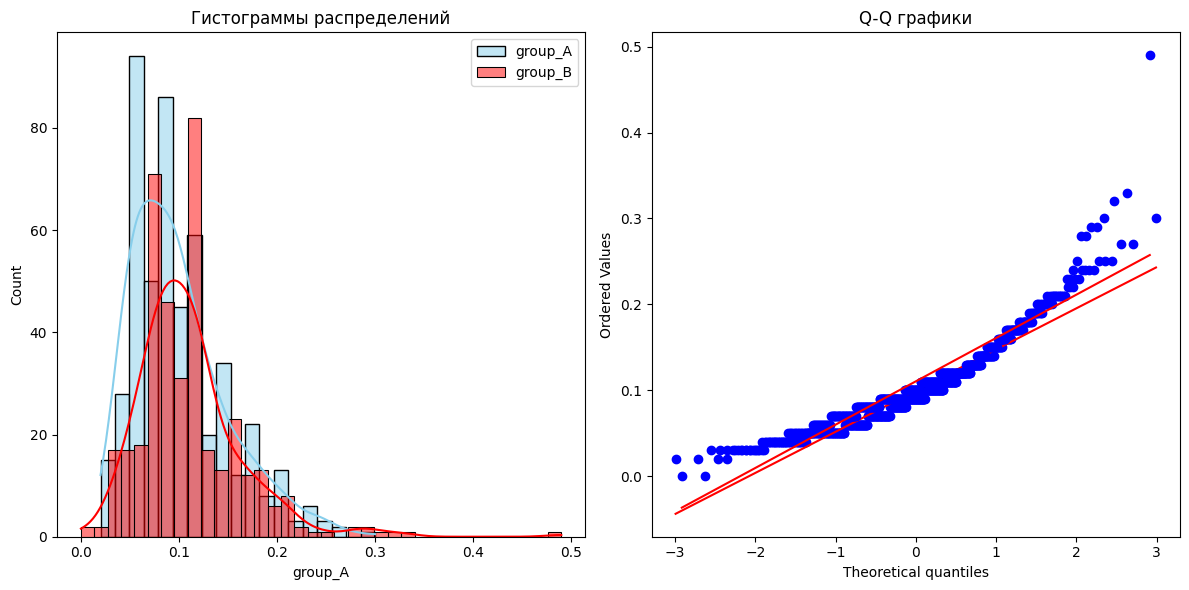


group_A:
Шапиро-Уилк: p-value = 0.0000 -> Не нормальное
Д'Агостино: p-value = 0.0000 -> Не нормальное

group_B:
Шапиро-Уилк: p-value = 0.0000 -> Не нормальное
Д'Агостино: p-value = 0.0000 -> Не нормальное

Тест Колмогорова-Смирнова: p-value = 0.0002 -> Распределения различны


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, ks_2samp

def compare_distributions(df, col1, col2, alpha=0.05):
    """
    Сравнивает распределения двух количественных переменных:
    - Визуализация распределений
    - Проверка нормальности (Шапиро-Уилк и Д'Агостино)
    - Тест Колмогорова-Смирнова для сравнения распределений
    """

    # Извлечение данных
    sample1 = df[col1].dropna()
    sample2 = df[col2].dropna()

    # Визуализация
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(sample1, kde=True, color='skyblue', label=col1)
    sns.histplot(sample2, kde=True, color='red', label=col2, alpha=0.5)
    plt.title('Гистограммы распределений')
    plt.legend()

    plt.subplot(1, 2, 2)
    stats.probplot(sample1, dist="norm", plot=plt)
    stats.probplot(sample2, dist="norm", plot=plt)
    plt.title('Q-Q графики')

    plt.tight_layout()
    plt.show()

    # Проверка нормальности
    def check_normality(sample, name):
        stat_sw, p_sw = shapiro(sample)
        stat_da, p_da = normaltest(sample)

        print(f"\n{name}:")
        print(f"Шапиро-Уилк: p-value = {p_sw:.4f}",
              "-> Нормальное" if p_sw > alpha else "-> Не нормальное")
        print(f"Д'Агостино: p-value = {p_da:.4f}",
              "-> Нормальное" if p_da > alpha else "-> Не нормальное")

    check_normality(sample1, col1)
    check_normality(sample2, col2)

    # Тест Колмогорова-Смирнова
    ks_stat, ks_p = ks_2samp(sample1, sample2)
    print(f"\nТест Колмогорова-Смирнова: p-value = {ks_p:.4f}",
          "-> Распределения одинаковы" if ks_p > alpha else "-> Распределения различны")

# Пример использования
# Создаем тестовый DataFrame
data = {
    'group_A': df_norm['Qu'],
    'group_B': df_disorder['Qu']
}
df = pd.DataFrame(data)

# Вызываем функцию для сравнения
compare_distributions(df, 'group_A', 'group_B', alpha=0.05)

In [ ]:
df_demo = pd.read_excel("/content/demographic_data_mental_disorders_diagnostics.xlsx")

In [ ]:
df_demo

,ID,Группа,Диагноз,Пол,Возраст,Уровень образования,Количество лет образования
0,PD-001,пациенты,шизотипическое расстройство,женский,19.0,среднее,11
1,PD-002,пациенты,биполярное аффективное расстройство,женский,26.0,высшее,17
2,PD-003,пациенты,шизотипическое расстройство,женский,17.0,среднее,10
3,PD-004,пациенты,пограничное расстройство личности,женский,16.0,среднее,9
4,PD-005,пациенты,шизотипическое расстройство,женский,19.0,среднее,11
...,...,...,...,...,...,...,...
341,PN-175,норма,нет,мужской,23.0,высшее,16
342,PN-181,норма,нет,женский,60.0,высшее,15
343,PN-182,норма,нет,женский,53.0,высшее,15
344,PN-183,норма,нет,мужской,18.0,незаконченное высшее,12


In [ ]:
df_patients = pd.read_excel("/content/транскрипты пациенты отредактировано.xlsx", index_col=0)

In [ ]:
df_patients

,group,fileID,transcript,discourse.type,stimulus,time.point
PD-001,PD,PD-001-instr-1-chair,Для начала нужно прикрепить детали к доске. Уж...,instr,chair,1
PD-001,PD,PD-001-pers-1-present,"Ну, больше всего меня впечатлил подарок мне на...",pers,present,1
PD-001,PD,PD-001-pic-1-sportsman,"Какой-то мужчина встречает бодибилдера, которы...",pic,sportsman,1
PD-002,PD,PD-002-instr-1-chair,"Чтобы собрать табуретку, нам нужно несколько д...",instr,chair,1
PD-002,PD,PD-002-pers-1-present,"Не такой уж обычный традиционный подарок, кото...",pers,present,1
...,...,...,...,...,...,...
PD-145,PD,PD-145-pers-1-party,Самое счастливое? Что-то мне вспоминается из д...,pers,party,1
PD-145,PD,PD-145-pic-1-winterday,"Малыш увидел в окне первый снег, решил пойти п...",pic,winterday,1
PD-146,PD,PD-146-instr-1-chair,Нижнюю часть табуретки составляет двое прутьев...,instr,chair,1
PD-146,PD,PD-146-pers-1-trip,"Боже мой, это бой. А, ну я знаю, про что расск...",pers,trip,1


In [ ]:
df_demo = df_demo.set_index("ID")

In [ ]:
df_diagnosis = df_patients.join(df_demo)
df_diagnosis[['fileID', 'Диагноз', 'transcript']].to_excel("transcripts_diagnoses.xlsx")

In [1]:
import pandas as pd

In [41]:
df_norm = pd.read_excel("/content/control_collocations.xlsx", sheet_name='lem')
df_md = pd.read_excel("/content/md_collocations.xlsx", sheet_name='lem')

In [42]:
df_norm['collocations'] = df_norm['Word'] + ' ' + df_norm['Collocation']

In [43]:
df_norm.drop('Collocation', axis=1, inplace=True)
df_norm.rename({'collocations': 'Collocation'}, axis=1, inplace=True)

In [44]:
df_md

,Word,Collocation,T-score
0,это,это быть,8.402122
1,это,что это,6.733661
2,это,после это,4.838980
3,это,всё это,4.566226
4,это,как это,4.463410
...,...,...,...
296,деталь,мелкий деталь,0.996455
297,сторона,другой сторона,6.011517
298,сторона,один сторона,4.473131
299,сторона,два сторона,3.707655


In [45]:
df_norm

,Word,T-score,Collocation
0,это,13.977091,это быть
1,это,9.831922,это после
2,это,7.579702,это что
3,это,6.169677,это всё
4,это,5.899682,это как
...,...,...,...
324,отверстие,1.361045,отверстие два
325,отверстие,1.359374,отверстие вверх
326,отверстие,1.354477,отверстие при
327,отверстие,1.329016,отверстие пол


In [68]:
df_result = df_md[['Collocation']].join(df_norm[['Collocation']], how='outer', lsuffix='_md', rsuffix='_norm')

In [69]:
df_result

,Collocation_md,Collocation_norm
0,это быть,это быть
1,что это,это после
2,после это,это что
3,всё это,это всё
4,как это,это как
...,...,...
324,NaN,отверстие два
325,NaN,отверстие вверх
326,NaN,отверстие при
327,NaN,отверстие пол


In [70]:
df_result.isna().sum()

,0
Collocation_md,28
Collocation_norm,0


In [67]:
df_result.to_excel('collocations.xlsx', index=False)

In [53]:
28*100/329

8.51063829787234

In [55]:
nan_row_count = df_result.isna().any(axis=1).sum()

# Total unique rows (based on the index 'Collocation')
total_unique_rows = len(df_result)

print(f"Rows with NaN: {nan_row_count *100 / total_unique_rows}")

Rows with NaN: 8.51063829787234


In [56]:
df_norm

,Word,T-score,Collocation
0,это,13.977091,это быть
1,это,9.831922,это после
2,это,7.579702,это что
3,это,6.169677,это всё
4,это,5.899682,это как
...,...,...,...
324,отверстие,1.361045,отверстие два
325,отверстие,1.359374,отверстие вверх
326,отверстие,1.354477,отверстие при
327,отверстие,1.329016,отверстие пол


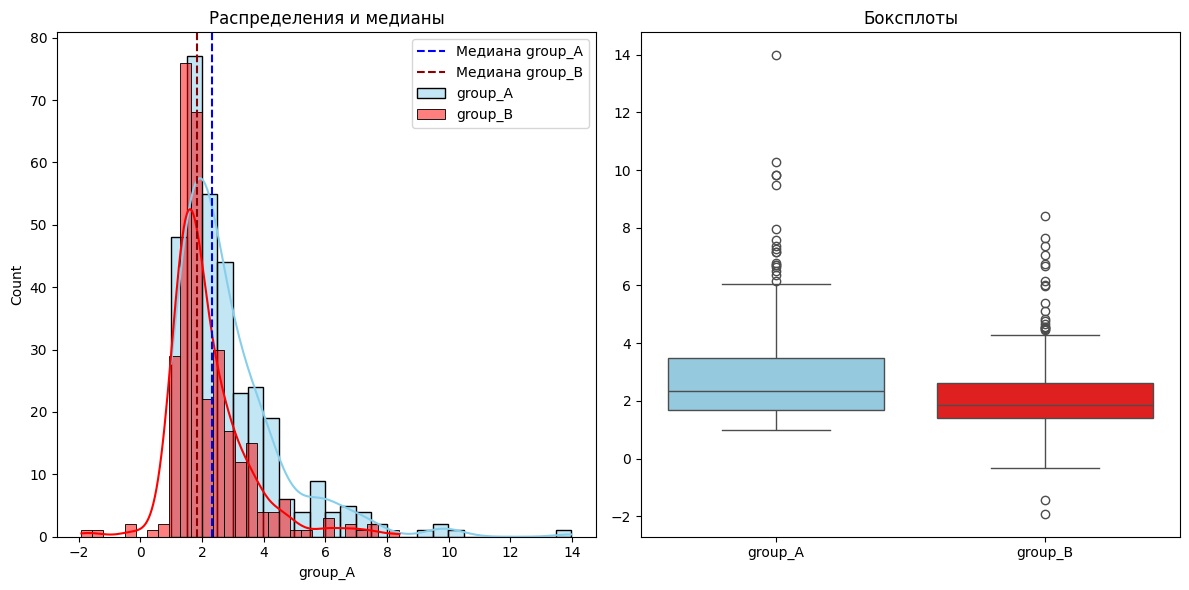


Проверка нормальности:
group_A: p-value = 0.0000 (не нормальное)
group_B: p-value = 0.0000 (не нормальное)

Тест Манна-Уитни:
U-статистика = 62909.0, p-value = 0.0000
Вывод: Есть различия в медианах (отвергаем H₀)
Размер эффекта (r): 0.234 (малый <0.1, средний 0.3, большой >0.5)


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu

def compare_samples_mannwhitney(df, col1, col2, alpha=0.05):
    """
    Сравнивает две количественные выборки с помощью U-теста Манна-Уитни:
    - Визуализация распределений
    - Проверка нормальности (Шапиро-Уилк)
    - Тест Манна-Уитни для сравнения медиан
    """

    # Извлечение данных
    sample1 = df[col1].dropna()
    sample2 = df[col2].dropna()

    # Визуализация
    plt.figure(figsize=(12, 6))

    # Гистограммы с медианами
    plt.subplot(1, 2, 1)
    sns.histplot(sample1, kde=True, color='skyblue', label=col1)
    sns.histplot(sample2, kde=True, color='red', label=col2, alpha=0.5)
    plt.axvline(sample1.median(), color='blue', linestyle='--', label=f'Медиана {col1}')
    plt.axvline(sample2.median(), color='darkred', linestyle='--', label=f'Медиана {col2}')
    plt.title('Распределения и медианы')
    plt.legend()

    # Боксплоты
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[[col1, col2]], palette=['skyblue', 'red'])
    plt.title('Боксплоты')

    plt.tight_layout()
    plt.show()

    # Проверка нормальности (для понимания данных)
    def check_normality(sample, name):
        stat_sw, p_sw = shapiro(sample)
        print(f"{name}: p-value = {p_sw:.4f}",
              "(нормальное)" if p_sw > alpha else "(не нормальное)")

    print("\nПроверка нормальности:")
    check_normality(sample1, col1)
    check_normality(sample2, col2)

    # Тест Манна-Уитни
    U_stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
    print(f"\nТест Манна-Уитни:")
    print(f"U-статистика = {U_stat}, p-value = {p_value:.4f}")
    print("Вывод:", "Есть различия в медианах (отвергаем H₀)" if p_value < alpha
          else "Нет различий в медианах (не отвергаем H₀)")

    # Размер эффекта (r = Z / sqrt(n))
    n1, n2 = len(sample1), len(sample2)
    Z = stats.norm.ppf(p_value/2)  # Z-значение для двустороннего теста
    r_effect = abs(Z) / np.sqrt(n1 + n2)
    print(f"Размер эффекта (r): {r_effect:.3f}",
          "(малый <0.1, средний 0.3, большой >0.5)" if r_effect < 0.5 else "")

# Пример использования
np.random.seed(42)
data = {
    'group_A': df_norm['T-score'],
    'group_B': df_md['T-score']
}
df = pd.DataFrame(data)

# Вызываем функцию для сравнения
compare_samples_mannwhitney(df, 'group_A', 'group_B', alpha=0.05)

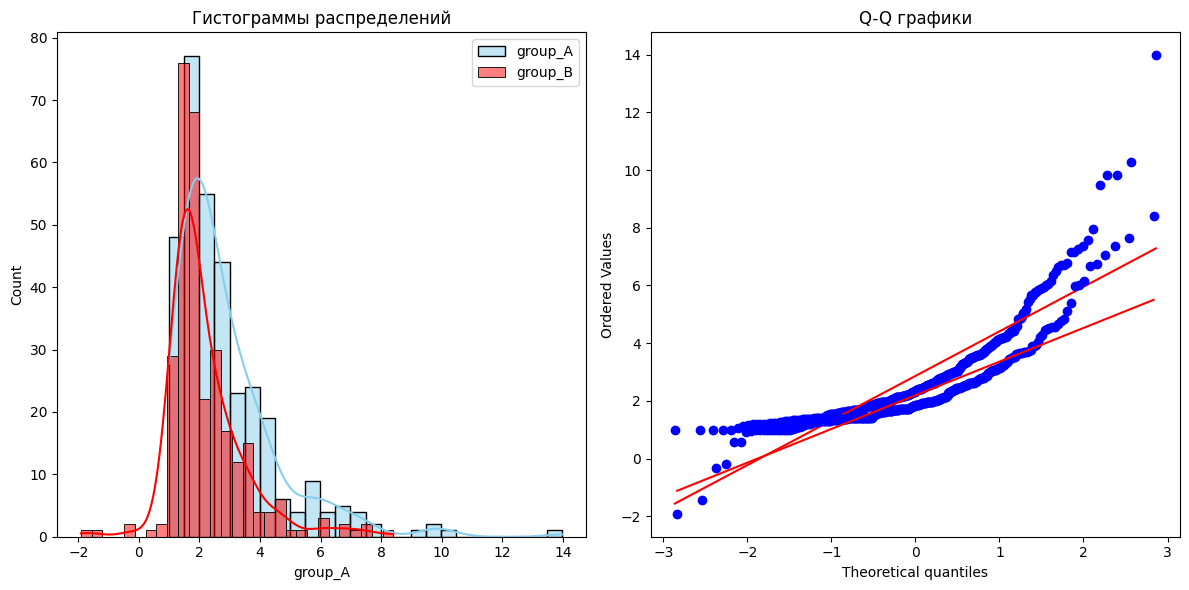


group_A:
Шапиро-Уилк: p-value = 0.0000 -> Не нормальное
Д'Агостино: p-value = 0.0000 -> Не нормальное

group_B:
Шапиро-Уилк: p-value = 0.0000 -> Не нормальное
Д'Агостино: p-value = 0.0000 -> Не нормальное

Тест Колмогорова-Смирнова: p-value = 0.0000 -> Распределения различны


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, ks_2samp

def compare_distributions(df, col1, col2, alpha=0.05):
    """
    Сравнивает распределения двух количественных переменных:
    - Визуализация распределений
    - Проверка нормальности (Шапиро-Уилк и Д'Агостино)
    - Тест Колмогорова-Смирнова для сравнения распределений
    """

    # Извлечение данных
    sample1 = df[col1].dropna()
    sample2 = df[col2].dropna()

    # Визуализация
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(sample1, kde=True, color='skyblue', label=col1)
    sns.histplot(sample2, kde=True, color='red', label=col2, alpha=0.5)
    plt.title('Гистограммы распределений')
    plt.legend()

    plt.subplot(1, 2, 2)
    stats.probplot(sample1, dist="norm", plot=plt)
    stats.probplot(sample2, dist="norm", plot=plt)
    plt.title('Q-Q графики')

    plt.tight_layout()
    plt.show()

    # Проверка нормальности
    def check_normality(sample, name):
        stat_sw, p_sw = shapiro(sample)
        stat_da, p_da = normaltest(sample)

        print(f"\n{name}:")
        print(f"Шапиро-Уилк: p-value = {p_sw:.4f}",
              "-> Нормальное" if p_sw > alpha else "-> Не нормальное")
        print(f"Д'Агостино: p-value = {p_da:.4f}",
              "-> Нормальное" if p_da > alpha else "-> Не нормальное")

    check_normality(sample1, col1)
    check_normality(sample2, col2)

    # Тест Колмогорова-Смирнова
    ks_stat, ks_p = ks_2samp(sample1, sample2)
    print(f"\nТест Колмогорова-Смирнова: p-value = {ks_p:.4f}",
          "-> Распределения одинаковы" if ks_p > alpha else "-> Распределения различны")

# Пример использования
# Создаем тестовый DataFrame

df = pd.DataFrame(data)

# Вызываем функцию для сравнения
compare_distributions(df, 'group_A', 'group_B', alpha=0.05)


In [59]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_norm['T-score'], df_md['T-score'])
print(f"p-value: {p_value}")
# If p < 0.05 → difference is statistically significant

p-value: 5.4027179328820505e-08


In [60]:
p_value

np.float64(5.4027179328820505e-08)